## MIDS W207 Final Project: Home Price Prediction

### Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Load data 

In [3]:
df_train = pd.read_csv('../MIDS_W207_Final_Project/data/train.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 81)

### EDA

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
# Identify the missing data and calculate the percentage by feature.
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


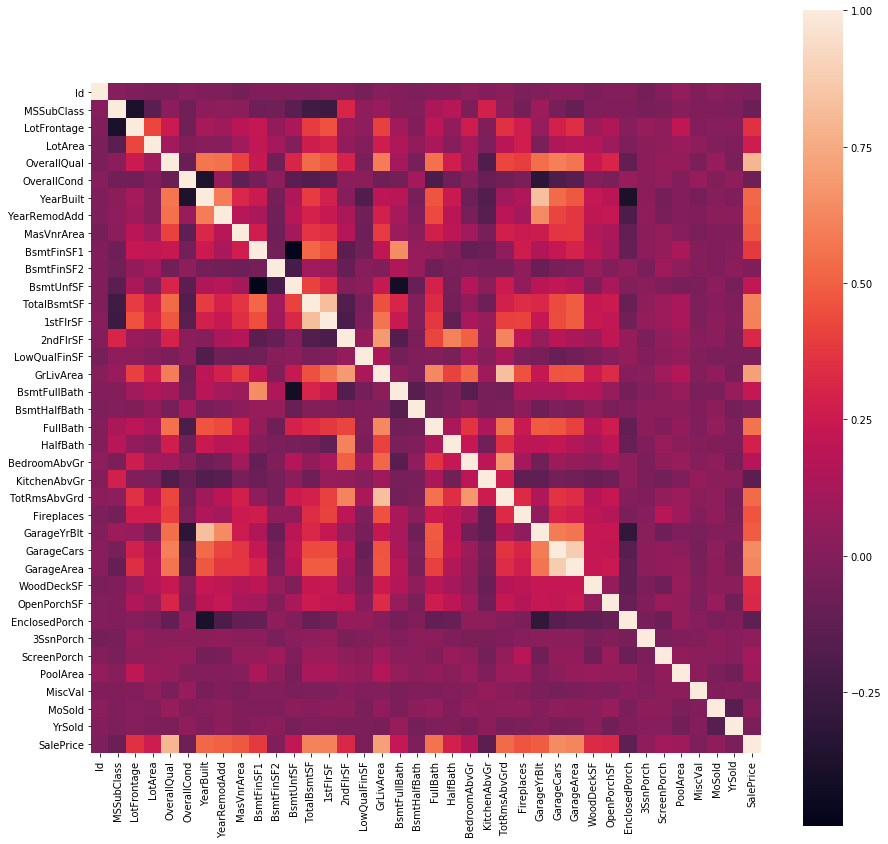

In [10]:
# Comprehensive correlation analysis 
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, square=True)

### Select some features highly correlated with `SalePrice` and having no missing data, and check the distributions.

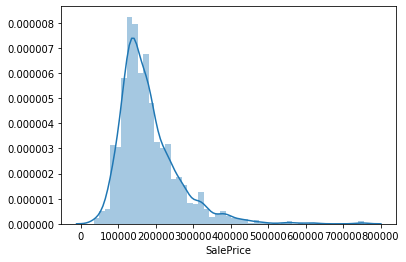

In [33]:
sns.distplot(df_train['SalePrice'])

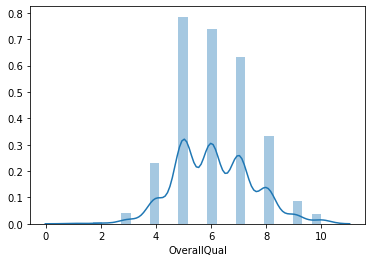

In [35]:
sns.distplot(df_train['OverallQual'])

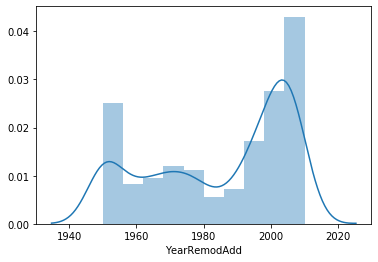

In [86]:
sns.distplot(df_train['YearRemodAdd'])

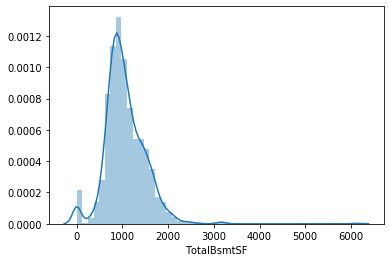

In [94]:
sns.distplot(df_train['TotalBsmtSF'])

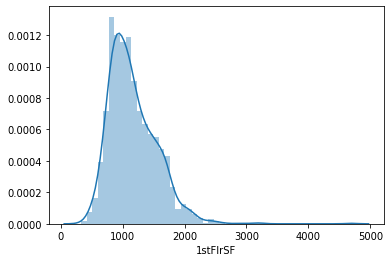

In [96]:
sns.distplot(df_train['1stFlrSF'])

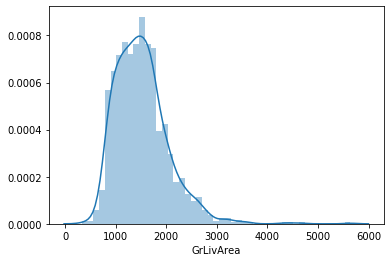

In [37]:
sns.distplot(df_train['GrLivArea'])

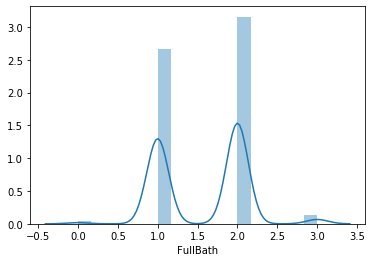

In [97]:
sns.distplot(df_train['FullBath'])

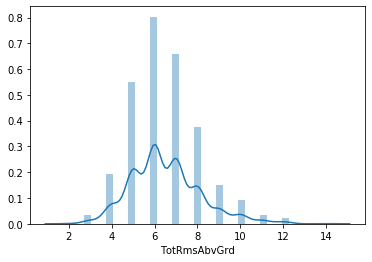

In [98]:
sns.distplot(df_train['TotRmsAbvGrd'])

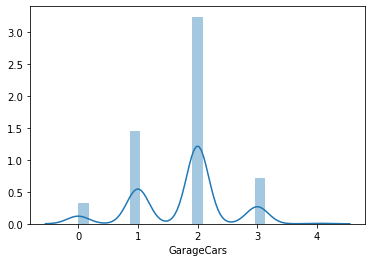

In [99]:
sns.distplot(df_train['GarageCars'])

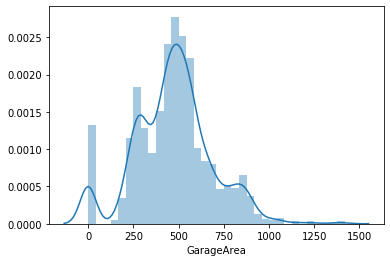

In [100]:
sns.distplot(df_train['GarageArea'])

### Use only the above features for baseline prediction. 

In [12]:
# Select the features checked above. 
# Slice the first 1000 rows of `train.csv` as the traning data and the rest as the dev data.
train_features = df_train[:1000][['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
train_y = df_train[:1000]['SalePrice']
dev_features = df_train[1001:][['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
dev_y = df_train[1001:]['SalePrice']

In [13]:
# Train a linear regression model.
lr = LinearRegression()
lr.fit(train_features, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Evaluate the model's R-square on training data.
lr.score(train_features, train_y)

0.8069207714745614

In [18]:
# Evaluate the model's R-square on dev data.
lr.score(dev_features, dev_y)

0.6725721877896282

In [16]:
# Evaluate the model's RMSE on train data.
np.sqrt(metrics.mean_squared_error(train_y, lr.predict(train_features)))

35262.942790578476

In [19]:
# Evaluate the model's RMSE on dev data.
np.sqrt(metrics.mean_squared_error(dev_y, lr.predict(dev_features)))

44311.78307353977